# KNN으로 포지션 예측하기

In [56]:
# Random값을 정하기
import numpy as np
np.random.seed(5)

In [57]:
import pandas as pd

In [58]:
train = pd.read_csv('../Data/basketball_train.csv')
test = pd.read_csv('../Data/basketball_test.csv')

In [59]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Georgios Papagiannis,C,0.0,3.9,0.8
1,Eric Gordon,SG,3.3,2.7,0.5
2,Joel Embiid,C,1.2,7.8,2.5
3,Alexis Ajinca,C,0.0,4.5,0.6
4,Sean Kilpatrick,SG,1.5,4.0,0.1


In [60]:
test.head()

,Player,Pos,3P,TRB,BLK
0,Bismack Biyombo,C,0.0,7.0,1.1
1,Jamal Murray,SG,1.4,2.6,0.3
2,Montrezl Harrell,C,0.0,3.8,0.7
3,Rudy Gobert,C,0.0,12.8,2.6
4,Pau Gasol,C,0.9,7.8,1.1


In [61]:
print(train.shape)
print(train.count)
print(train.isnull().sum())

(80, 5)
<bound method DataFrame.count of                   Player Pos   3P   TRB  BLK
0   Georgios Papagiannis   C  0.0   3.9  0.8
1            Eric Gordon  SG  3.3   2.7  0.5
2            Joel Embiid   C  1.2   7.8  2.5
3          Alexis Ajinca   C  0.0   4.5  0.6
4        Sean Kilpatrick  SG  1.5   4.0  0.1
..                   ...  ..  ...   ...  ...
75      Patrick Beverley  SG  1.6   5.9  0.4
76          Marcus Smart  SG  1.2   3.9  0.4
77         Anthony Davis   C  0.5  11.8  2.2
78         Iman Shumpert  SG  1.2   2.9  0.4
79           Ian Mahinmi   C  0.0   4.8  0.8

[80 rows x 5 columns]>
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


In [62]:
print(test.shape)
print(test.count)
print(test.isnull().sum())

(20, 5)
<bound method DataFrame.count of                Player Pos   3P   TRB  BLK
0     Bismack Biyombo   C  0.0   7.0  1.1
1        Jamal Murray  SG  1.4   2.6  0.3
2    Montrezl Harrell   C  0.0   3.8  0.7
3         Rudy Gobert   C  0.0  12.8  2.6
4           Pau Gasol   C  0.9   7.8  1.1
5        Allen Crabbe  SG  1.7   2.9  0.3
6        Ben McLemore  SG  1.1   2.1  0.1
7     Jordan Crawford  SG  1.9   1.8  0.1
8      Jamal Crawford  SG  1.4   1.6  0.2
9        Andrew Bogut   C  0.0   8.1  0.9
10  Marreese Speights   C  1.3   4.5  0.5
11     Dewayne Dedmon   C  0.0   6.5  0.8
12     Timofey Mozgov   C  0.0   4.9  0.6
13      Manu Ginobili  SG  1.3   2.3  0.2
14     Justin Holiday  SG  1.2   2.7  0.4
15        Willie Reed   C  0.0   4.7  0.7
16     Chris Andersen   C  0.0   2.6  0.6
17         Tony Snell  SG  1.8   3.1  0.2
18        Salah Mejri   C  0.0   4.2  0.8
19    Josh Richardson  SG  1.4   3.2  0.7>
Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64


### 최적의 k 찾기 (교차 검증 - cross validaiotion)

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score # 교차검증

In [64]:
# 최적의 k를 찾기 위해 교차 검증을 수행할 k의 점위를 3부터 학습데이터의  절반까지 지정
max_k_range = train.shape[0] // 2
max_k_range

40

In [65]:
# 최적의 k를 찾기 위한 범위 확인
k_list = []
for i in range(3, max_k_range, 2):
    k_list.append(i)

k_list

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [66]:
# 점수 및 Train Data 정의
cross_validation_scores = []
x_train = train[['3P','BLK','TRB']]
y_train = train['Pos']

print(x_train.head())
print(y_train.head())

    3P  BLK  TRB
0  0.0  0.8  3.9
1  3.3  0.5  2.7
2  1.2  2.5  7.8
3  0.0  0.6  4.5
4  1.5  0.1  4.0
0     C
1    SG
2     C
3     C
4    SG
Name: Pos, dtype: object


In [67]:
# 교차검증 (10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장
    # train(6) : validation(2) : test(2)
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    # cross_val_score에서 자동으로 값을 저장해준다.
    scores = cross_val_score(
        # 모델 이름
        knn,
        x_train,
        y_train,
        # cv : cross validation(교차검증 횟수)
        cv=10,
        scoring='accuracy'
    )
    cross_validation_scores.append(scores.mean())

cross_validation_scores

[0.925,
 0.8875,
 0.9,
 0.8875,
 0.9,
 0.9,
 0.9,
 0.8875,
 0.875,
 0.8625,
 0.8625,
 0.8625,
 0.85,
 0.85,
 0.85,
 0.8375,
 0.825,
 0.8125,
 0.8125]

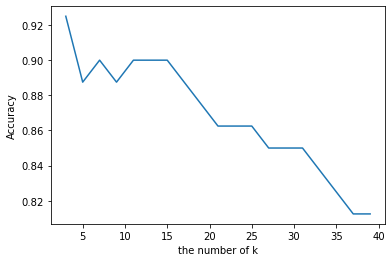

In [68]:
# k에 따른 정확도를 시각화
import matplotlib.pyplot as plt

plt.plot(k_list, cross_validation_scores)
plt.xlabel('the number of k')
plt.ylabel('Accuracy')
plt.show()

In [69]:
# 가장 예측률이 높은 k를 선정
cvs = cross_validation_scores
k = k_list[cvs.index(max(cross_validation_scores))]
print("The best number of k is", k)

The best number of k is 3


---
## 2개의 특징으로 예측하기 (3점슛, 블로킹)


In [70]:
from sklearn.neighbors import KNeighborsClassifier

In [71]:
knn = KNeighborsClassifier(n_neighbors=k)

In [72]:
# 학습에 사용할 Features
x_train = train[['3P','BLK']]

In [73]:
# 학습에 사용할 target
y_train = train['Pos']

In [74]:
# 학습시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [75]:
# 검증에 사용할 features
x_test = test[['3P','BLK']]

In [76]:
# 검증에 사용할 target
y_test = test['Pos']

In [77]:
# 정확도
knn.score(x_test, y_test)

0.95

In [78]:
# 예측
pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'C',
       'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG'], dtype=object)

In [79]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {'예측값':pred,
     '정답' : y_test
    }
)
comparison.head()

,예측값,정답
0,C,C
1,SG,SG
2,C,C
3,C,C
4,C,C


## Confusion Matrix

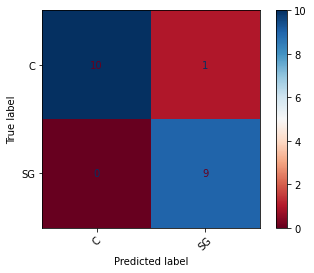

In [82]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix= confusion_matrix1,
    display_labels= target_names
)
disp.plot(
    cmap= plt.cm.RdBu,
    xticks_rotation=45
)
plt.show()

---
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [117]:
knn = KNeighborsClassifier(n_neighbors=k)

In [127]:
# 학습에 사용할 Features
x_train = train[['3P','BLK','TRB']]

In [128]:
# 학습에 사용할 target
y_train = train['Pos']

In [129]:
# 학습시키기
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [130]:
# 검증에 사용할 features
x_test = test[['3P','BLK','TRB']]

In [131]:
# 검증에 사용할 target
y_test = test['Pos']

In [132]:
# 정확도
knn.score(x_test, y_test)

0.95

In [133]:
# 예측
pred = knn.predict(x_test)
pred

array(['C', 'SG', 'C', 'C', 'C', 'SG', 'SG', 'SG', 'SG', 'C', 'SG', 'C',
       'C', 'SG', 'SG', 'C', 'C', 'SG', 'C', 'SG'], dtype=object)

In [134]:
# 실제값과 예측값의 비교
comparison = pd.DataFrame(
    {'예측값':pred,
     '정답' : y_test
    }
)
comparison.head()

,예측값,정답
0,C,C
1,SG,SG
2,C,C
3,C,C
4,C,C


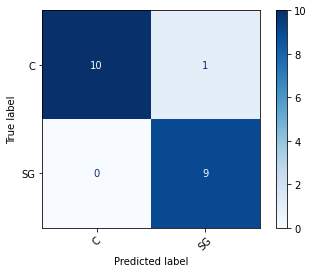

In [135]:
# 혼동행렬(3개 특징)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

confusion_matrix1 = confusion_matrix(y_test, pred)
target_names = ['C','SG']
disp = ConfusionMatrixDisplay(
    confusion_matrix= confusion_matrix1,
    display_labels= target_names
)
disp.plot(
    cmap= plt.cm.Blues,
    xticks_rotation=45
)
plt.show()

In [136]:
# 예측
pred = knn.predict([[3.4,0.5,3.7]])
pred

array(['SG'], dtype=object)